In [1]:
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
import cmocean

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


## Reading in the 1/16 degree data and performing energy decomposition

In [2]:
%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.0625deg_N15_baseline/
fs = xr.open_dataset('static.nc', decode_times=False)
os = xr.open_dataset('ocean.stats.nc', decode_times=False)
av = xr.open_dataset('averages_00006002.nc', decode_times=False)
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/p/univ/unyu0004/gmarques/NeverWorld2/nw2_0.0625deg_N15_baseline
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [3]:
#Read in data
Nlayers=15
lon=fs['geolon']; lat=fs['geolat']
#depth = fs['depth_ocean']
rhomat= np.transpose(np.tile(os['Layer'],[2240,960,1]),(2,0,1)) 
xh_00625 = fs.xh.values
yh_00625 = fs.yh.values
area_t=fs['area_t']


KE_ij_00625 = np.zeros([100,2240,960])
for i in range(100):
    h  = np.array(av['h'][i,:,:,:]);
    depth_3D=np.transpose(np.tile(np.nansum(h,axis=0),[Nlayers,1,1]),(0,1,2))
    u  = np.array(av['u'][i,:,:,:]); u = 0.5*(u[:,:,1:]+u[:,:,:-1]); u[np.isnan(u)]=0;
    v  = np.array(av['v'][i,:,:,:]); v = 0.5*(v[:,1:,:]+v[:,:-1,:]); v[np.isnan(v)]=0;
    h[np.isnan(h)]=0.0
    KE_3D = rhomat*h*(u**2+v**2)/(2*1025*depth_3D)
    KE_ij_00625[i,:,:]= np.nansum(KE_3D,axis=0)
    print(i)
print('done')
KE_ij_00625=np.nanmean(KE_ij_00625,axis=0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
done


In [4]:
%cd /glade/p/univ/unyu0004/eyankovsky/Bachman2019_KHTH500_C01
fs= xr.open_dataset('static.nc', decode_times=False)
av = xr.open_mfdataset(['averages_00031502.nc'],decode_times=False)
os = xr.open_dataset('ocean.stats.nc',decode_times=False)
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/p/univ/unyu0004/eyankovsky/Bachman2019_KHTH500_C01


In [6]:
#Read in data
Nlayers=15
lon=fs['geolon']; lat=fs['geolat']
#depth = fs['depth_ocean']
rhomat= np.transpose(np.tile(os['Layer'],[280,120,1]),(2,0,1)) 
xh_GME01 = fs.xh.values
yh_GME01 = fs.yh.values
area_t=fs['area_t']


KE_ij_GME01 = np.zeros([100,280,120])
for i in range(100):
    h  = np.array(av['h'][i,:,:,:]);
    depth_3D=np.transpose(np.tile(np.nansum(h,axis=0),[Nlayers,1,1]),(0,1,2))
    u  = np.array(av['u'][i,:,:,:]); u = 0.5*(u[:,:,1:]+u[:,:,:-1]); u[np.isnan(u)]=0;
    v  = np.array(av['v'][i,:,:,:]); v = 0.5*(v[:,1:,:]+v[:,:-1,:]); v[np.isnan(v)]=0;
    h[np.isnan(h)]=0.0
    KE_3D = rhomat*h*(u**2+v**2)/(2*1025*depth_3D)
    KE_ij_GME01[i,:,:]= np.nansum(KE_3D,axis=0)
    print(i)
print('done')
KE_ij_GME01=np.nanmean(KE_ij_GME01,axis=0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
done


In [7]:
%cd /glade/p/univ/unyu0004/eyankovsky/Bachman2019_KHTH500_default
fs= xr.open_dataset('static.nc', decode_times=False)
av = xr.open_mfdataset(['averages_00031502.nc'],decode_times=False)
os = xr.open_dataset('ocean.stats.nc',decode_times=False)
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/p/univ/unyu0004/eyankovsky/Bachman2019_KHTH500_default
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [8]:
#Read in data
Nlayers=15
lon=fs['geolon']; lat=fs['geolat']
#depth = fs['depth_ocean']
rhomat= np.transpose(np.tile(os['Layer'],[280,120,1]),(2,0,1)) 
xh_GME1 = fs.xh.values
yh_GME1 = fs.yh.values
area_t=fs['area_t']


KE_ij_GME1 = np.zeros([100,280,120])
for i in range(100):
    h  = np.array(av['h'][i,:,:,:]);
    depth_3D=np.transpose(np.tile(np.nansum(h,axis=0),[Nlayers,1,1]),(0,1,2))
    u  = np.array(av['u'][i,:,:,:]); u = 0.5*(u[:,:,1:]+u[:,:,:-1]); u[np.isnan(u)]=0;
    v  = np.array(av['v'][i,:,:,:]); v = 0.5*(v[:,1:,:]+v[:,:-1,:]); v[np.isnan(v)]=0;
    h[np.isnan(h)]=0.0
    KE_3D = rhomat*h*(u**2+v**2)/(2*1025*depth_3D)
    KE_ij_GME1[i,:,:]= np.nansum(KE_3D,axis=0)
    print(i)
print('done')
KE_ij_GME1=np.nanmean(KE_ij_GME1,axis=0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
done


Text(0.5, 1.0, 'Kinetic Energy')

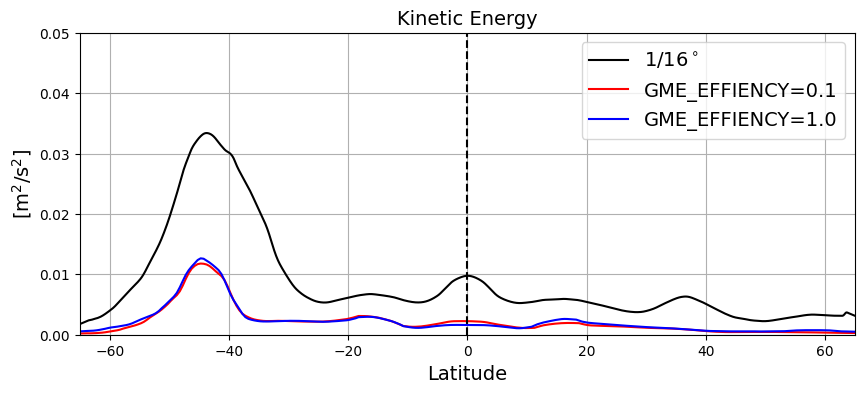

In [10]:
#For the convolution window use N=240 for 1/32 deg.; N=120 for 1/16deg.; N=60 for 1/8deg.; and N=30 for 1/4deg.
window=120
plt.figure(figsize=(10, 4), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(yh_00625,np.convolve(np.nanmean(KE_ij_00625,axis=1), np.ones((window,))/window, mode='same'),'-',color='k')
window=15
plt.plot(yh_GME01,np.convolve(np.nanmean(KE_ij_GME01,axis=1), np.ones((window,))/window, mode='same'),'-',color='r')
plt.plot(yh_GME1,np.convolve(np.nanmean(KE_ij_GME1,axis=1), np.ones((window,))/window, mode='same'),'-',color='b')

plt.grid()

plt.legend(['1/16$^\circ$','GME_EFFIENCY=0.1','GME_EFFIENCY=1.0'],loc='upper right',fontsize=14)
plt.plot([0, 0],[0, 1],'--',color=[0,0,0])
plt.xlim(-65, 65)
plt.ylim(0,.05);
plt.xlabel('Latitude',fontsize=14)
plt.ylabel('[m$^2$/s$^2$]',fontsize=14)
plt.title('Kinetic Energy',fontsize=14)